# Netflix Dataset Analysis


## Questions we need to answer


* Which month has least and highest releases ?
* Trend in number of movies and TV show across years
* which country had highest releases , movies & TV show ?
* Details of content released in India
* Directors with highest number of release
* All the TV show listed as dramas , released in India
* All the content with Tom Cruise as cast
* Movies released after 2020
* Most popular rating



## Basic Information about dataset

In [145]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import plotly.express as px

In [3]:
#df is data file.
df = pd.read_csv('netflix_titles.csv')

In [22]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [26]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [28]:
df.shape

(8807, 12)

In [30]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [32]:
df.duplicated().sum()

0

In [21]:
#checking for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

## Basic Summary

* The dataset has 8807 rows, 12 columns
* No duplicates in the dataset.
* Data has null values . We have to clean it.
* coloumn names - [['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description']]

### Cleaning Data

In [134]:
#filling director column null values with "unknown" string 
df.director.fillna('unkown', inplace=True)

In [130]:
#filling cast column null values with "unknown" string
df.cast.fillna('unkown', inplace=True)

In [131]:
#filling country column null values with "unknown" string
df.country.fillna('unkown', inplace=True)

In [39]:
#filling date_added,rating,duration column null values with mode values

mode_im = ['date_added','rating','duration']
for i in mode_im:
    df[i] = df[i].fillna(df[i].mode()[0])

In [97]:
#changing date_added format
df.date_added = pd.to_datetime(df.date_added)

In [98]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [99]:
#adding month column
df['Month'] = df.date_added.dt.month_name()

In [100]:
#adding year column
df['Year'] = df.date_added.dt.year

In [101]:
#Data after cleaning
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0


In [105]:
#Which month has least and highest releases ?
df.Month.value_counts()

July         827
December     813
September    770
April        764
October      760
August       755
March        742
January      738
June         728
November     705
May          632
February     563
Name: Month, dtype: int64

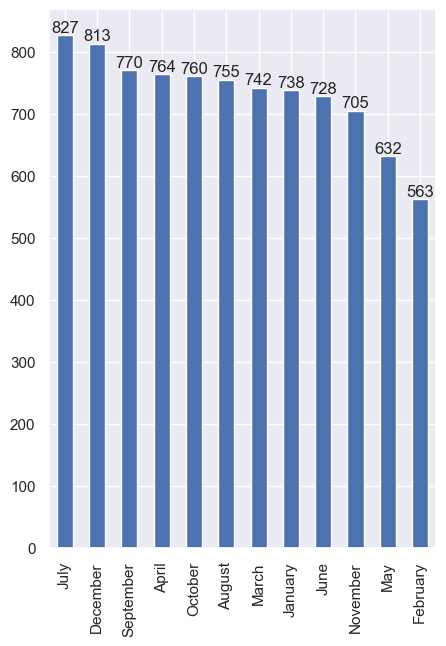

In [106]:
ax = df.Month.value_counts().plot(kind='bar')

for bars in ax.containers:
    ax.bar_label(bars)

* Which month has least and highest releases ?
* least - February(563)
* highest - July(827)

* Trend in number of movies and TV show across years

In [70]:
#relase per year
r_y=df.groupby('release_year').size().reset_index(name='counts').tail(6)
r_y

,release_year,counts
68,2016,902
69,2017,1032
70,2018,1147
71,2019,1030
72,2020,953
73,2021,592


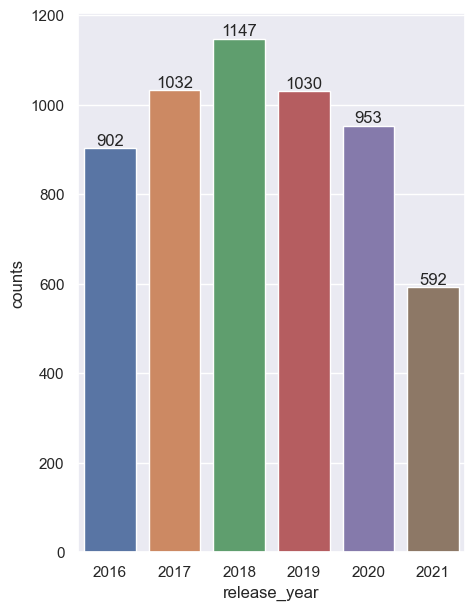

In [71]:
ay = sns.barplot(data = r_y, x = 'release_year',y='counts')
sns.set(rc={'figure.figsize':(5,7)})
for bars in ay.containers:
    ay.bar_label(bars)

In [77]:
#release of movies & tv shows per year
df.groupby('release_year')['type'].value_counts().tail(12)


release_year  type   
2016          Movie      658
              TV Show    244
2017          Movie      767
              TV Show    265
2018          Movie      767
              TV Show    380
2019          Movie      633
              TV Show    397
2020          Movie      517
              TV Show    436
2021          TV Show    315
              Movie      277
Name: type, dtype: int64

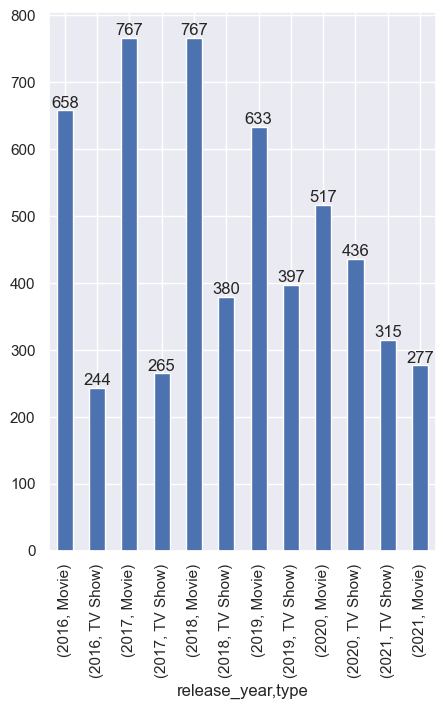

In [89]:
ax =df.groupby('release_year')['type'].value_counts().tail(12).plot(kind='bar')
for bars in ax.containers:
    ax.bar_label(bars)

* which country had highest releases , movies & TV show ?

In [84]:
df.country.value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

<Axes: >

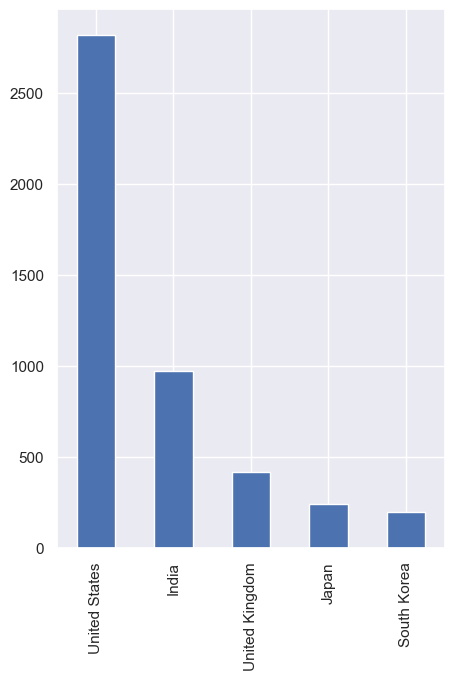

In [88]:
df.country.value_counts().head(5).plot(kind='bar')

* Details of content released in India

In [110]:
df[df.country=='India'].head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,2021-09-21,1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,September,2021.0
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,2021-09-16,2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",September,2021.0


* Directors with highest number of release

In [118]:
director_count=df.director.value_counts().reset_index(name='counts').head(5)
director_count

,index,counts
0,Rajiv Chilaka,19
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14


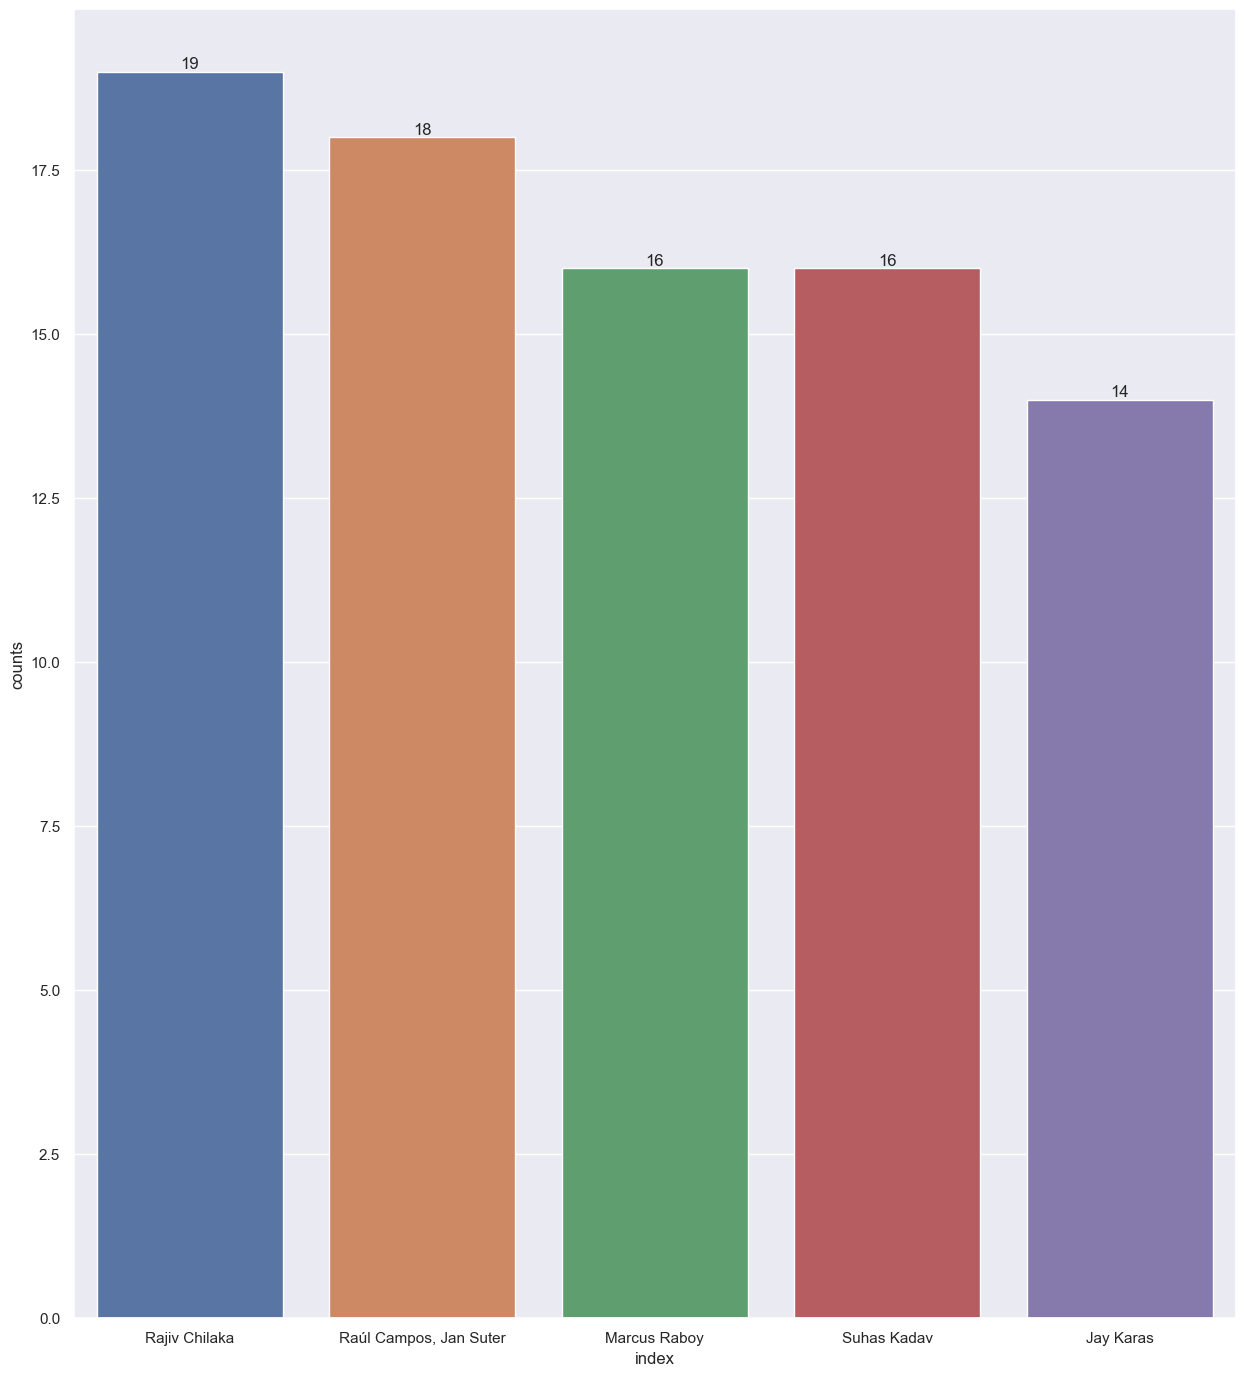

In [151]:
ad = sns.barplot(data = director_count, x = 'index',y='counts' )
sns.set(rc={'figure.figsize':(15,17)})
for bars in ad.containers:
    ad.bar_label(bars)

* All the TV show listed as dramas , released in India

In [135]:
df[(df.country=="India") &(df.type=="TV Show") & (df.listed_in.str.contains('Dramas'))] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
50,s51,TV Show,Dharmakshetra,unkown,"Kashmira Irani, Chandan Anand, Dinesh Mehta, A...",India,2021-09-15,2014,TV-PG,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...","After the ancient Great War, the god Chitragup...",September,2021.0
69,s70,TV Show,Stories by Rabindranath Tagore,unkown,unkown,India,2021-09-15,2015,TV-PG,1 Season,"International TV Shows, TV Dramas",The writings of Nobel Prize winner Rabindranat...,September,2021.0
1227,s1228,TV Show,Bombay Begums,unkown,"Pooja Bhatt, Shahana Goswami, Amruta Subhash, ...",India,2021-03-08,2021,TV-MA,1 Season,"International TV Shows, TV Dramas","From boardrooms to society's margins, five amb...",March,2021.0
1282,s1283,TV Show,Zindagi in Short,unkown,unkown,India,2021-02-22,2020,TV-MA,1 Season,"International TV Shows, TV Dramas","Complicated marriages, digital romances, domes...",February,2021.0
1293,s1294,TV Show,Pitta Kathalu,"Tharun Bhascker Dhaassyam, B. V. Nandini Reddy...","Manchu Lakshmi, Saanve Megghana, Naveen Kumar,...",India,2021-02-19,2021,TV-MA,1 Season,"International TV Shows, TV Dramas","From secrets and lies to jealousy and control,...",February,2021.0
1520,s1521,TV Show,Paava Kadhaigal,"Sudha Kongara, Vignesh Shivan, Gautham Vasudev...","Kalidas Jayaram, Shanthnu Bhagyaraj, Bhavani S...",India,2020-12-18,2020,TV-MA,1 Season,"International TV Shows, TV Dramas","At times dark, at times disturbing, four short...",December,2020.0
2086,s2087,TV Show,Masaba Masaba,unkown,"Masaba Gupta, Neena Gupta, Neil Bhoopalam, Ryt...",India,2020-08-28,2020,TV-MA,1 Season,"International TV Shows, TV Comedies, TV Dramas",Real life mom-daughter duo Neena and Masaba Gu...,August,2020.0
2751,s2752,TV Show,Akbar Birbal,unkown,"Kiku Sharda, Vishal Kotian, Delnaaz Irani",India,2020-03-31,2019,TV-G,1 Season,"Kids' TV, TV Comedies, TV Dramas","From battles of wit to fights for justice, Emp...",March,2020.0
2792,s2793,TV Show,She,unkown,"Aaditi Pohankar, Vijay Varma, Vishwas Kini, Ki...",India,2020-03-20,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",An undercover assignment to expose a drug ring...,March,2020.0
3036,s3037,TV Show,Jamtara - Sabka Number Ayega,Soumendra Padhi,"Amit Sial, Dibyendu Bhattacharya, Aksha Pardha...",India,2020-01-10,2020,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas",A group of small-town young men run a lucrativ...,January,2020.0


* All the content with Tom Cruise as cast

In [138]:
df[df.cast.str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,2021-08-01,1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio...",August,2021.0
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,2021-03-01,1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki...",March,2021.0


* Movies released after 2020

In [139]:
df[df.Year>2020.0]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Month,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unkown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",September,2021.0
1,s2,TV Show,Blood & Water,unkown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",September,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unkown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,September,2021.0
3,s4,TV Show,Jailbirds New Orleans,unkown,unkown,unkown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",September,2021.0
4,s5,TV Show,Kota Factory,unkown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,September,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8272,s8273,Movie,The Departed,Martin Scorsese,"Leonardo DiCaprio, Matt Damon, Jack Nicholson,...","United States, Hong Kong",2021-01-01,2006,R,151 min,"Dramas, Thrillers",Two rookie Boston cops are sent deep undercove...,January,2021.0
8320,s8321,Movie,The Girl with the Dragon Tattoo,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...","United States, Sweden, Norway",2021-01-05,2011,R,158 min,"Dramas, Thrillers",When a young computer hacker is tasked with in...,January,2021.0
8434,s8435,Movie,The Naked Gun: From the Files of Police Squad!,David Zucker,"Leslie Nielsen, Priscilla Presley, George Kenn...",United States,2021-01-01,1988,PG-13,85 min,"Comedies, Cult Movies",Hapless cop Frank Drebin causes more problems ...,January,2021.0
8437,s8438,TV Show,The Netflix Afterparty,unkown,"David Spade, London Hughes, Fortune Feimster",United States,2021-01-02,2021,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies","Hosts David Spade, Fortune Feimster and London...",January,2021.0


In [ ]:
#df[['Duration','unit']] = df.duration.str.split(' ', expand=True)
#df[(df.Duration>'1')&(df.Duration>'89')]

* Most popular rating

In [143]:
d_rating=df.rating.value_counts().reset_index(name='counts')
d_rating

,index,counts
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


In [147]:
pieChart = px.pie(d_rating, values='counts', names='index', title='content ratings on Netflix')
pieChart.show()

# 